In [1]:
# Install pandas_ta if not already installed
!pip install pandas_ta


In [2]:

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import MinMaxScaler
import pandas_ta as ta  # for technical indicators

# Load the dataset
df = pd.read_csv("NIFTY.csv")

# Convert 'date' column to datetime format
df['timestamp'] = pd.to_datetime(df['date'])

# Set 'timestamp' as index
df.set_index('timestamp', inplace=True)

# Display first few rows of the dataset
df.head()


,date,open,high,low,close,volume
timestamp,,,,,,
2015-01-09 09:15:00,2015-01-09 09:15:00,8285.45,8295.90,8285.45,8292.10,0
2015-01-09 09:16:00,2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,0
2015-01-09 09:17:00,2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,0
2015-01-09 09:18:00,2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,0
2015-01-09 09:19:00,2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,0


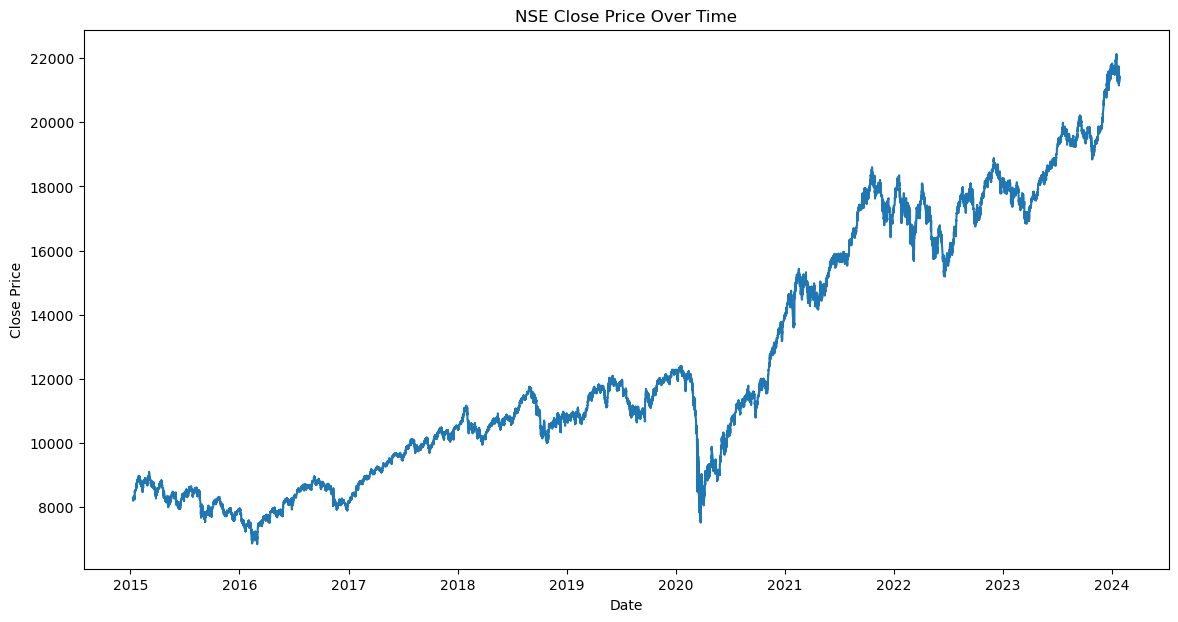

In [3]:
# Visualizations
# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(df['close'])
plt.title('NSE Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


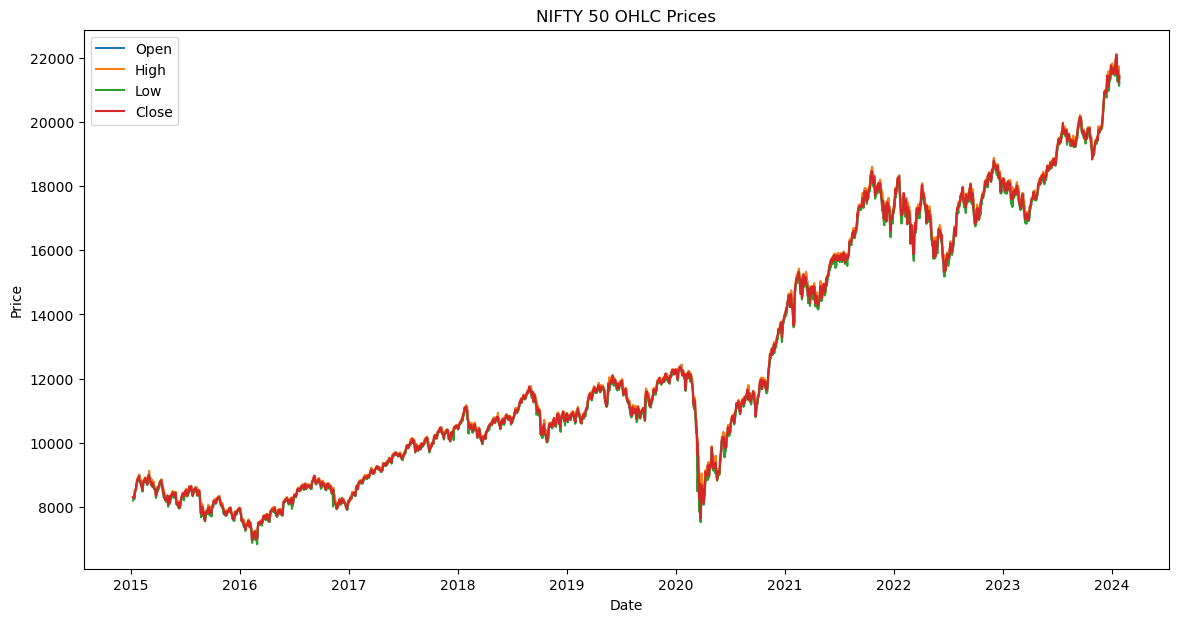

In [4]:
# Resample data to daily OHLC
daily_ohlc = df.resample('D').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last'})

# Drop any missing data
daily_ohlc.dropna(inplace=True)

# Plotting OHLC prices
plt.figure(figsize=(14, 7))
plt.plot(daily_ohlc['open'], label='Open')
plt.plot(daily_ohlc['high'], label='High')
plt.plot(daily_ohlc['low'], label='Low')
plt.plot(daily_ohlc['close'], label='Close')
plt.title('NIFTY 50 OHLC Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


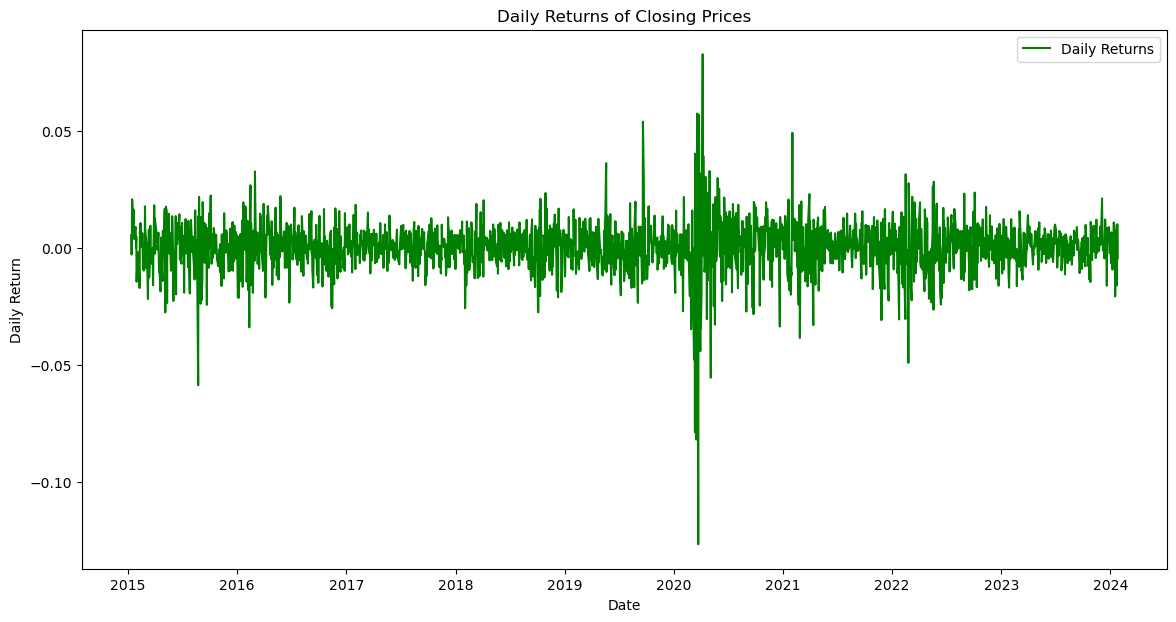

In [5]:
# Calculate daily returns
daily_ohlc['Daily Return'] = daily_ohlc['close'].pct_change()

# Plotting daily returns
plt.figure(figsize=(14, 7))
plt.plot(daily_ohlc.index, daily_ohlc['Daily Return'], label='Daily Returns', color='green')
plt.title('Daily Returns of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


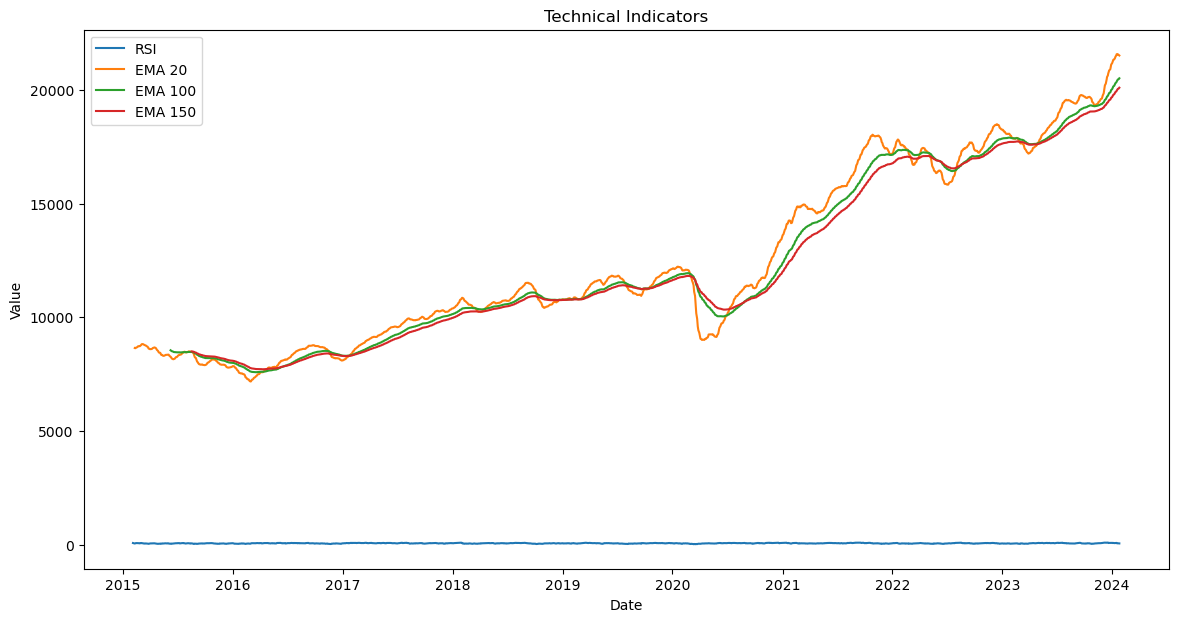

In [6]:
# Calculate RSI and Moving Averages
daily_ohlc['RSI'] = ta.rsi(daily_ohlc['close'], length=15)
daily_ohlc['EMA20'] = ta.ema(daily_ohlc['close'], length=20)
daily_ohlc['EMA100'] = ta.ema(daily_ohlc['close'], length=100)
daily_ohlc['EMA150'] = ta.ema(daily_ohlc['close'], length=150)

# Plotting RSI and Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(daily_ohlc['RSI'], label='RSI')
plt.plot(daily_ohlc['EMA20'], label='EMA 20')
plt.plot(daily_ohlc['EMA100'], label='EMA 100')
plt.plot(daily_ohlc['EMA150'], label='EMA 150')
plt.title('Technical Indicators')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\doles\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


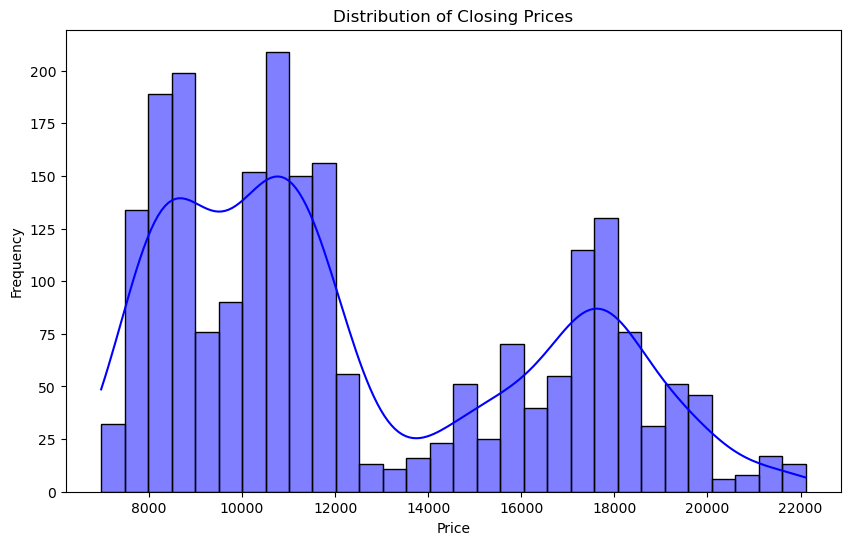

In [7]:
# Plotting distribution of closing prices
plt.figure(figsize=(10, 6))
sns.histplot(daily_ohlc['close'], kde=True, bins=30, color='blue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


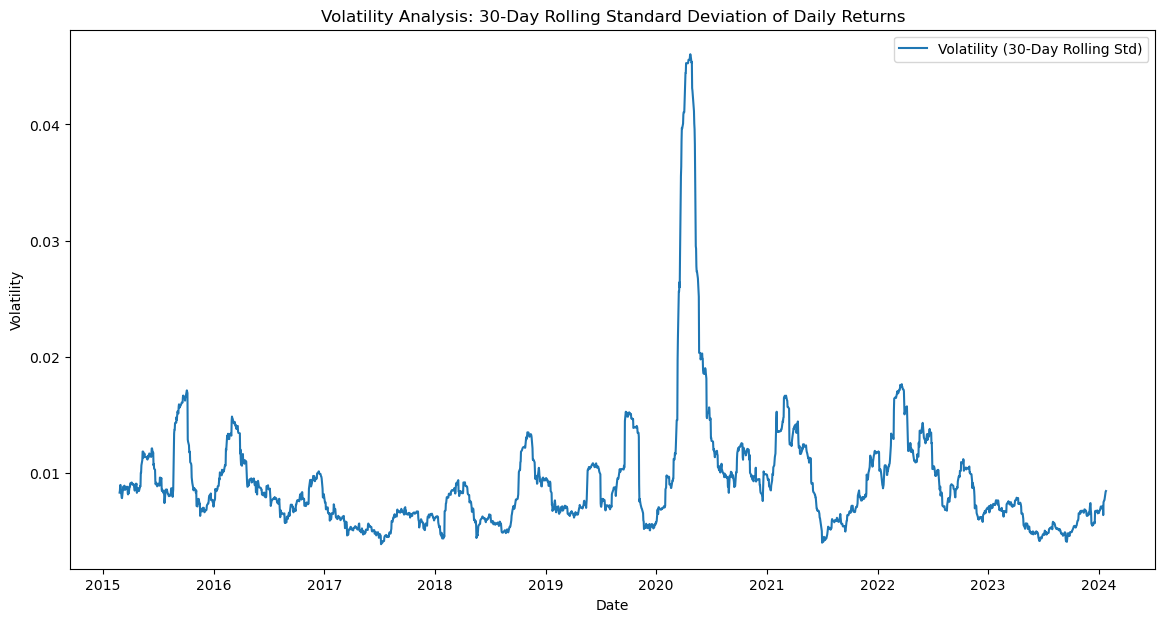

In [8]:
# Calculate daily returns
daily_ohlc['Daily Return'] = daily_ohlc['close'].pct_change()

# Calculate rolling standard deviation of returns
rolling_std = daily_ohlc['Daily Return'].rolling(window=30).std()

# Plotting volatility
plt.figure(figsize=(14, 7))
plt.plot(daily_ohlc.index, rolling_std, label='Volatility (30-Day Rolling Std)')
plt.title('Volatility Analysis: 30-Day Rolling Standard Deviation of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


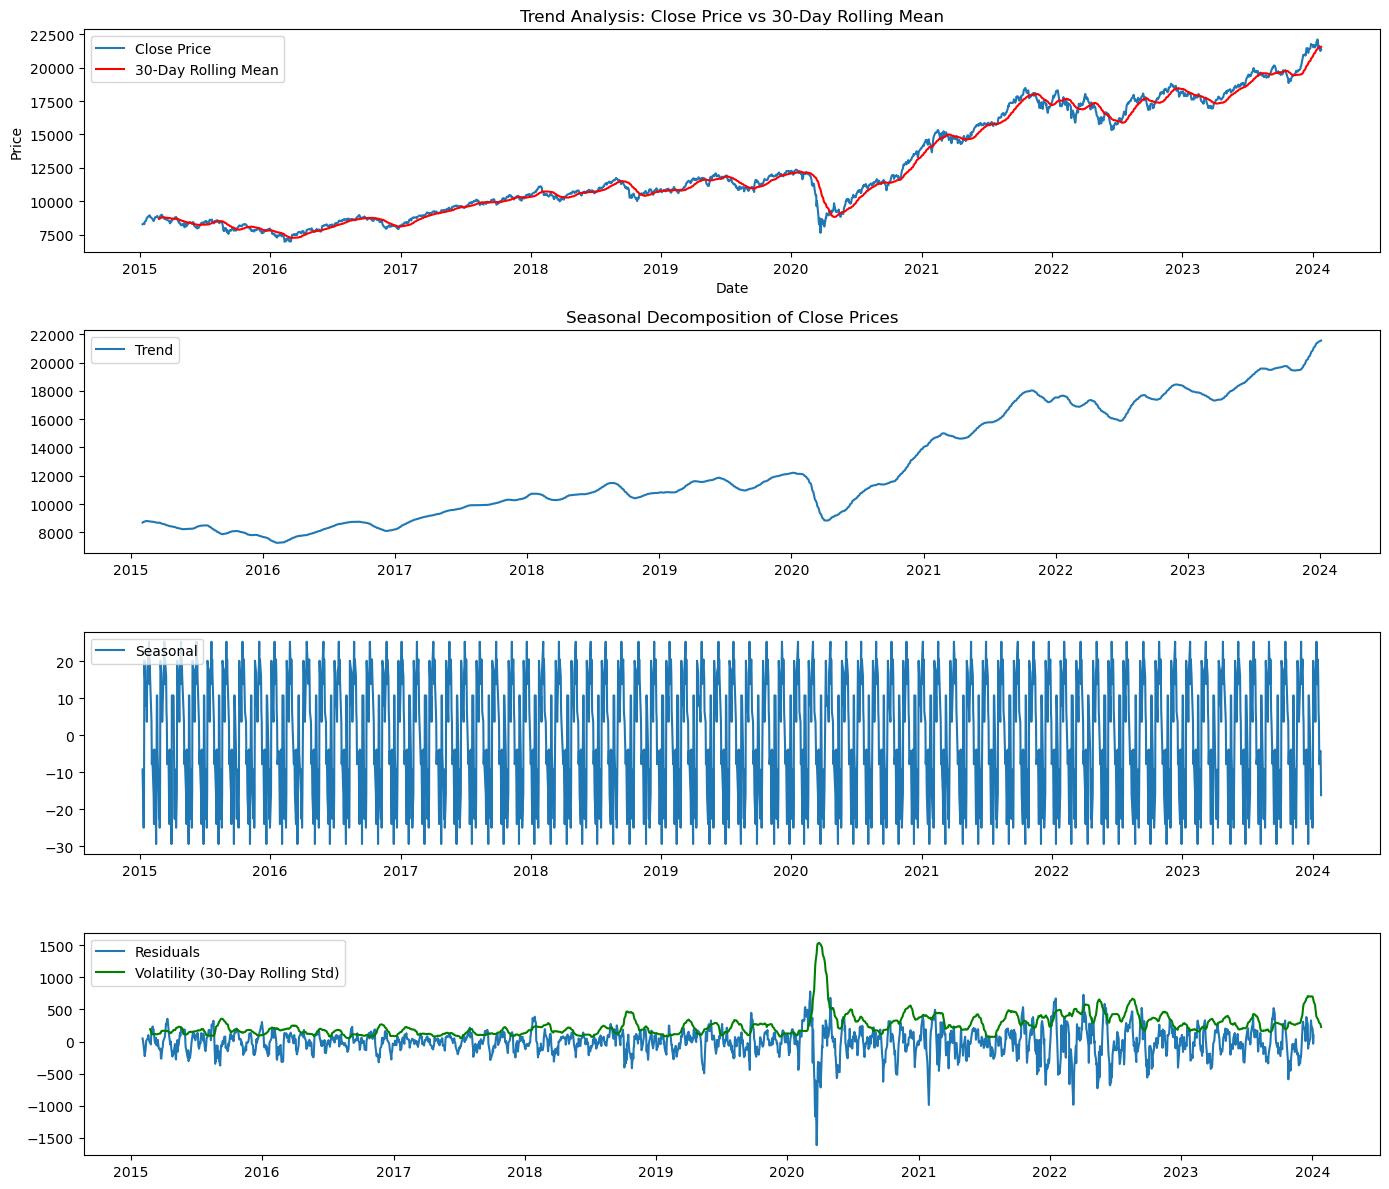

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming daily_ohlc is already defined and has a 'close' column
# Make sure the 'daily_ohlc' DataFrame is indexed by datetime

# Calculate the 30-day rolling mean and standard deviation
rolling_mean = daily_ohlc['close'].rolling(window=30).mean()
rolling_std = daily_ohlc['close'].rolling(window=30).std()

# Perform seasonal decomposition
decomposition = seasonal_decompose(daily_ohlc['close'], model='additive', period=30)

plt.figure(figsize=(14, 12))

# Plot the close price and rolling mean
plt.subplot(411)
plt.plot(daily_ohlc.index, daily_ohlc['close'], label='Close Price')
plt.plot(rolling_mean.index, rolling_mean, label='30-Day Rolling Mean', color='red')
plt.title('Trend Analysis: Close Price vs 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot the trend component of the decomposition
plt.subplot(412)
plt.plot(daily_ohlc.index, decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Seasonal Decomposition of Close Prices')

# Plot the seasonal component of the decomposition
plt.subplot(413)
plt.plot(daily_ohlc.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Plot the residuals and rolling standard deviation
plt.subplot(414)
plt.plot(daily_ohlc.index, decomposition.resid, label='Residuals')
plt.plot(daily_ohlc.index, rolling_std, label='Volatility (30-Day Rolling Std)', color='green')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [10]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(daily_ohlc['close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# Ensure p-value < 0.05
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")


ADF Statistic: 0.4836595586664803
p-value: 0.9843678878298945
Critial Values:
   1%, -3.4332831704990503
Critial Values:
   5%, -2.862835790766408
Critial Values:
   10%, -2.5674598111615343
The time series is not stationary.


In [11]:
if result[1] >= 0.05:
    daily_ohlc['close_diff'] = daily_ohlc['close'].diff().dropna()
    result_diff = adfuller(daily_ohlc['close_diff'].dropna())
    print('ADF Statistic (Differenced): %f' % result_diff[0])
    print('p-value (Differenced): %f' % result_diff[1])
    print('Critical Values (Differenced):')
    for key, value in result_diff[4].items():
        print('\t%s: %.3f' % (key, value))
    
    if result_diff[1] < 0.05:
        print("The differenced series is stationary.")
    else:
        print("The differenced series is still not stationary.")
else:
    print("No differencing required.")


ADF Statistic (Differenced): -17.077941
p-value (Differenced): 0.000000
Critical Values (Differenced):
	1%: -3.433
	5%: -2.863
	10%: -2.567
The differenced series is stationary.


In [12]:
# Convert daily OHLC data to DataFrame
df = pd.DataFrame(daily_ohlc)

# Drop NaN values if any
df.dropna(inplace=True)

# Reset index
df.reset_index(inplace=True)

# Drop 'timestamp' column
df.drop(['timestamp'], axis=1, inplace=True)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data_set_scaled = scaler.fit_transform(df)

# Print shape of scaled data
print(data_set_scaled.shape)


(2091, 10)


In [13]:
# Prepare input sequences and target variable
X = []
backcandles = 30  # Number of days to look back

# Create input sequences (X) and target variable (y)
for j in range(data_set_scaled.shape[1]):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i - backcandles:i, j])

# Convert lists to numpy arrays
X = np.moveaxis(X, [0], [2])
X, y = np.array(X), np.array(data_set_scaled[backcandles:, 3])  # Assuming 'close' is in the 4th column

# Reshape y to match LSTM input shape
y = np.reshape(y, (len(y), 1))

# Print shapes of X and y
print(X.shape)
print(y.shape)


(2061, 30, 10)
(2061, 1)


In [14]:
# Split data into train and test sets
split_limit = int(len(X) * 0.8)
X_train, X_test = X[:split_limit], X[split_limit:]
y_train, y_test = y[:split_limit], y[split_limit:]

# Print shapes of train and test sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1648, 30, 10) (1648, 1)
(413, 30, 10) (413, 1)


In [15]:
# Import necessary libraries for model building
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, Input
from keras.optimizers import Adam

# Define LSTM model architecture
model = Sequential()
model.add(LSTM(units=150, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.add(Activation('linear'))

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_split=0.1, shuffle=True)


Epoch 1/30


C:\Users\doles\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0044 - val_loss: 5.8499e-04
Epoch 2/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.7006e-04 - val_loss: 2.9360e-04
Epoch 3/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1585e-04 - val_loss: 4.9739e-04
Epoch 4/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2097e-04 - val_loss: 2.0253e-04
Epoch 5/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.8868e-05 - val_loss: 3.4175e-04
Epoch 6/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1927e-04 - val_loss: 3.7378e-04
Epoch 7/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.9563e-05 - val_loss: 2.0823e-04
Epoch 8/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.9807e-05 - val_loss: 3.5630e-04
Epoch 9/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.2578e-05 - val_loss: 2.2472e-04
Epoch 10/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.5240e-05 - val_loss: 7.9596e-04
Epoch 11/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1020e-04 - 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted: [0.6441002], Actual: [0.63462193]
Predicted: [0.6378699], Actual: [0.63214822]
Predicted: [0.63640463], Actual: [0.63852899]
Predicted: [0.6409004], Actual: [0.63497531]
Predicted: [0.6401077], Actual: [0.63365755]
Predicted: [0.63742954], Actual: [0.62314183]
Predicted: [0.6263603], Actual: [0.61858084]
Predicted: [0.6236531], Actual: [0.62825107]
Predicted: [0.63046646], Actual: [0.60907244]
Predicted: [0.6111683], Actual: [0.58327856]


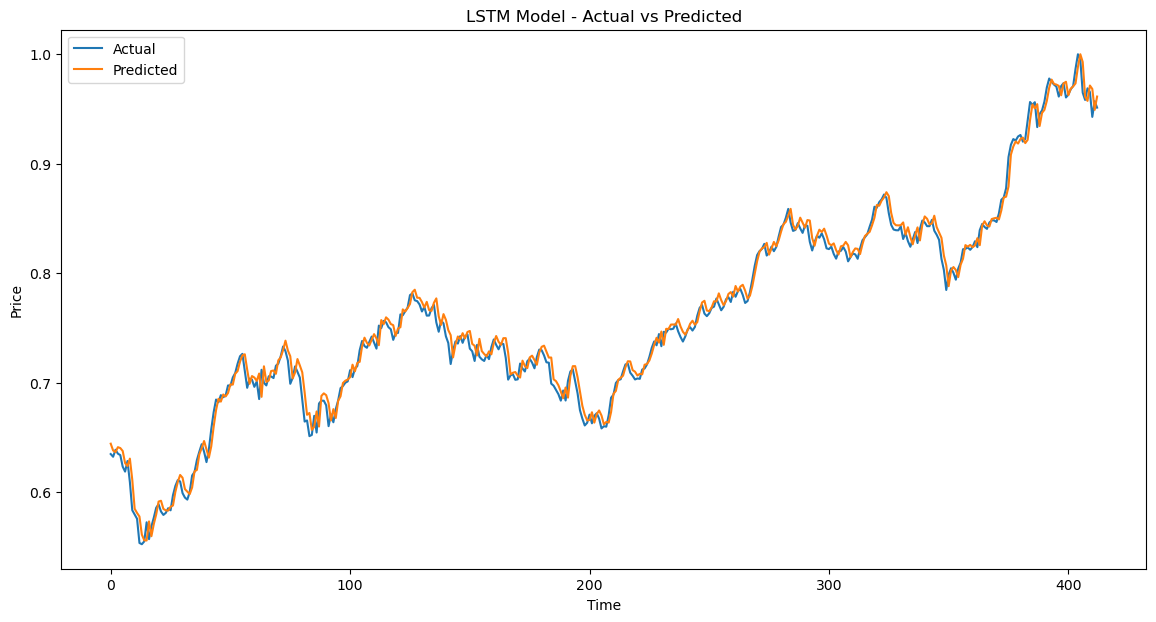

In [16]:
# Predict using the trained model
y_pred = model.predict(X_test)

# Print some predictions and actual values
for i in range(10):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")

# Plotting results
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('LSTM Model - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


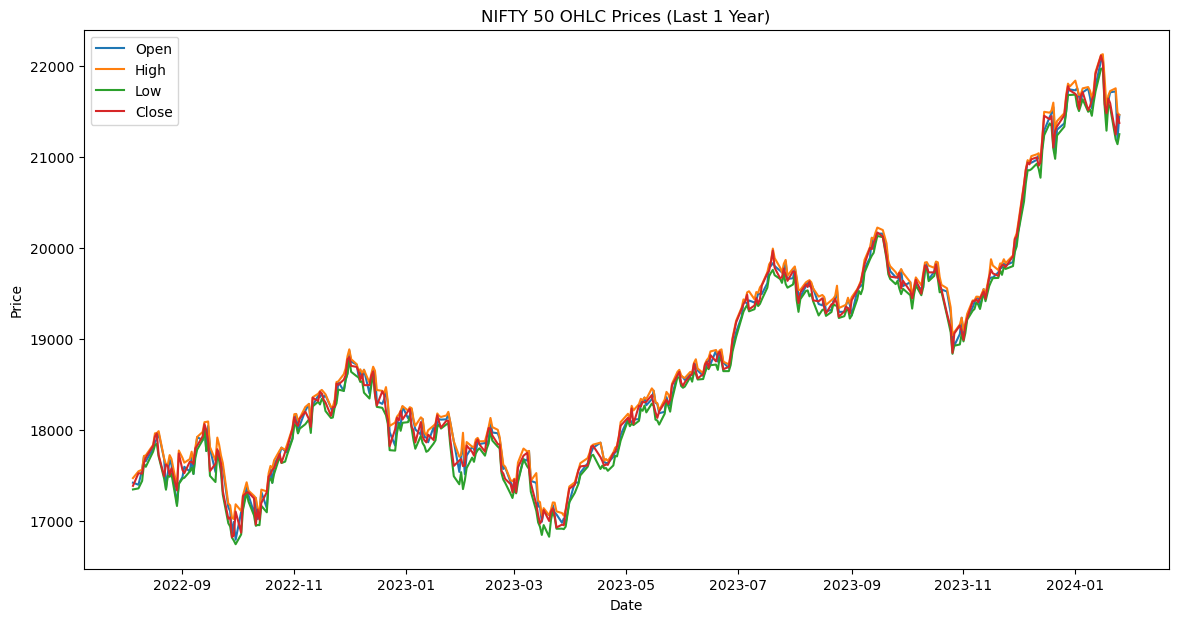

In [17]:
# Select data for the last 1 year
one_year_data = daily_ohlc.iloc[-365:]

# Plotting OHLC prices for the last 1 year
plt.figure(figsize=(14, 7))
plt.plot(one_year_data['open'], label='Open')
plt.plot(one_year_data['high'], label='High')
plt.plot(one_year_data['low'], label='Low')
plt.plot(one_year_data['close'], label='Close')
plt.title('NIFTY 50 OHLC Prices (Last 1 Year)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [18]:
# Convert daily OHLC data to DataFrame
df_subset = pd.DataFrame(one_year_data)

# Drop NaN values if any
df_subset.dropna(inplace=True)

# Reset index
df_subset.reset_index(inplace=True)

# Drop 'timestamp' column
df_subset.drop(['timestamp'], axis=1, inplace=True)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data_set_scaled = scaler.fit_transform(df_subset)

# Print shape of scaled data
print(data_set_scaled.shape)


(365, 10)


(268, 30, 10) (268, 1)
(67, 30, 10) (67, 1)
Epoch 1/30


C:\Users\doles\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0399 - val_loss: 0.0016
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - val_loss: 8.5302e-04
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.2265e-04 - val_loss: 0.0011
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4815e-04 - val_loss: 0.0018
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 6.4257e-04
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9167e-04 - val_loss: 0.0012
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2620e-04 - val_loss: 8.9774e-04
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

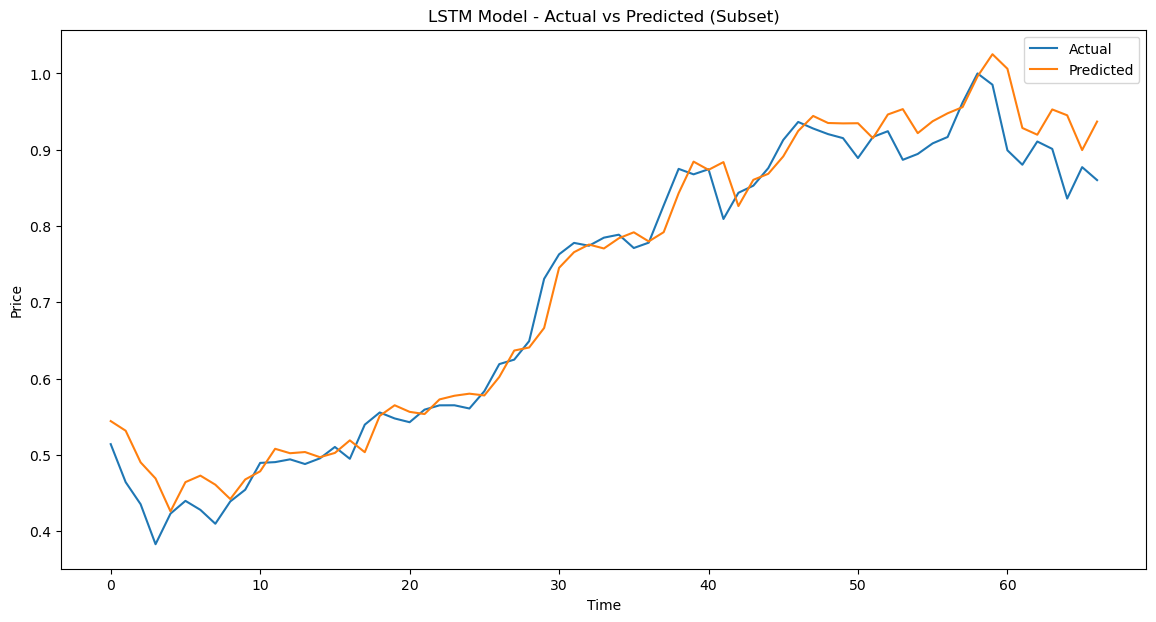

In [19]:
# Prepare input sequences and target variable for LSTM
X_subset = []
backcandles = 30  # Number of days to look back

# Create input sequences (X) and target variable (y) for the subset data
for j in range(data_set_scaled.shape[1]):
    X_subset.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X_subset[j].append(data_set_scaled[i - backcandles:i, j])

# Convert lists to numpy arrays
X_subset = np.moveaxis(X_subset, [0], [2])
X_subset, y_subset = np.array(X_subset), np.array(data_set_scaled[backcandles:, 3])  # Assuming 'close' is in the 4th column

# Reshape y to match LSTM input shape
y_subset = np.reshape(y_subset, (len(y_subset), 1))

# Split subset data into train and test sets
split_limit_subset = int(len(X_subset) * 0.8)
X_train_subset, X_test_subset = X_subset[:split_limit_subset], X_subset[split_limit_subset:]
y_train_subset, y_test_subset = y_subset[:split_limit_subset], y_subset[split_limit_subset:]

# Print shapes of train and test sets for subset
print(X_train_subset.shape, y_train_subset.shape)
print(X_test_subset.shape, y_test_subset.shape)

# Define and compile LSTM model architecture for subset
model_subset = Sequential()
model_subset.add(LSTM(units=150, input_shape=(X_train_subset.shape[1], X_train_subset.shape[2])))
model_subset.add(Dense(units=1))
model_subset.add(Activation('linear'))
optimizer = Adam(learning_rate=0.001)
model_subset.compile(optimizer=optimizer, loss='mse')

# Train LSTM model on subset data
history_subset = model_subset.fit(X_train_subset, y_train_subset, epochs=30, batch_size=10, validation_split=0.1, shuffle=True)

# Predict using the trained LSTM model on subset test data
y_pred_subset = model_subset.predict(X_test_subset)

# Plotting results for subset predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test_subset, label='Actual')
plt.plot(y_pred_subset, label='Predicted')
plt.title('LSTM Model - Actual vs Predicted (Subset)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


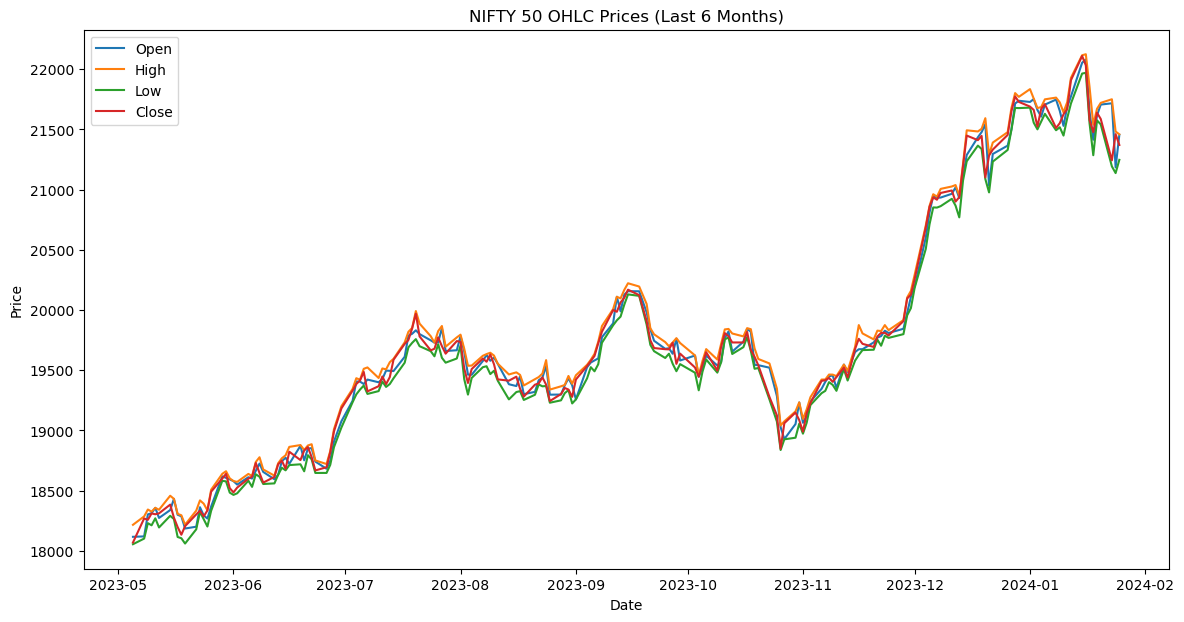

In [20]:
# Select data for the last 6 months
six_months_data = daily_ohlc.iloc[-183:]

# Plotting OHLC prices for the last 6 months
plt.figure(figsize=(14, 7))
plt.plot(six_months_data['open'], label='Open')
plt.plot(six_months_data['high'], label='High')
plt.plot(six_months_data['low'], label='Low')
plt.plot(six_months_data['close'], label='Close')
plt.title('NIFTY 50 OHLC Prices (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [21]:
# Convert daily OHLC data to DataFrame
df_six_months = pd.DataFrame(six_months_data)

# Drop NaN values if any
df_six_months.dropna(inplace=True)

# Reset index
df_six_months.reset_index(inplace=True)

# Drop 'timestamp' column
df_six_months.drop(['timestamp'], axis=1, inplace=True)

# Normalize the dataset
scaler_six_months = MinMaxScaler(feature_range=(0, 1))
data_set_scaled_six_months = scaler_six_months.fit_transform(df_six_months)

# Print shape of scaled data
print(data_set_scaled_six_months.shape)


(183, 10)


(122, 30, 10) (122, 1)
(31, 30, 10) (31, 1)
Epoch 1/30


C:\Users\doles\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0676 - val_loss: 0.0651
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - val_loss: 0.0073
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - val_loss: 0.0278
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022 - val_loss: 0.0135
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020 - val_loss: 0.0187
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020 - val_loss: 0.0129
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - val_loss: 0.0121
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 0.0146
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0114
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0099
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 0.0110
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 0.0047

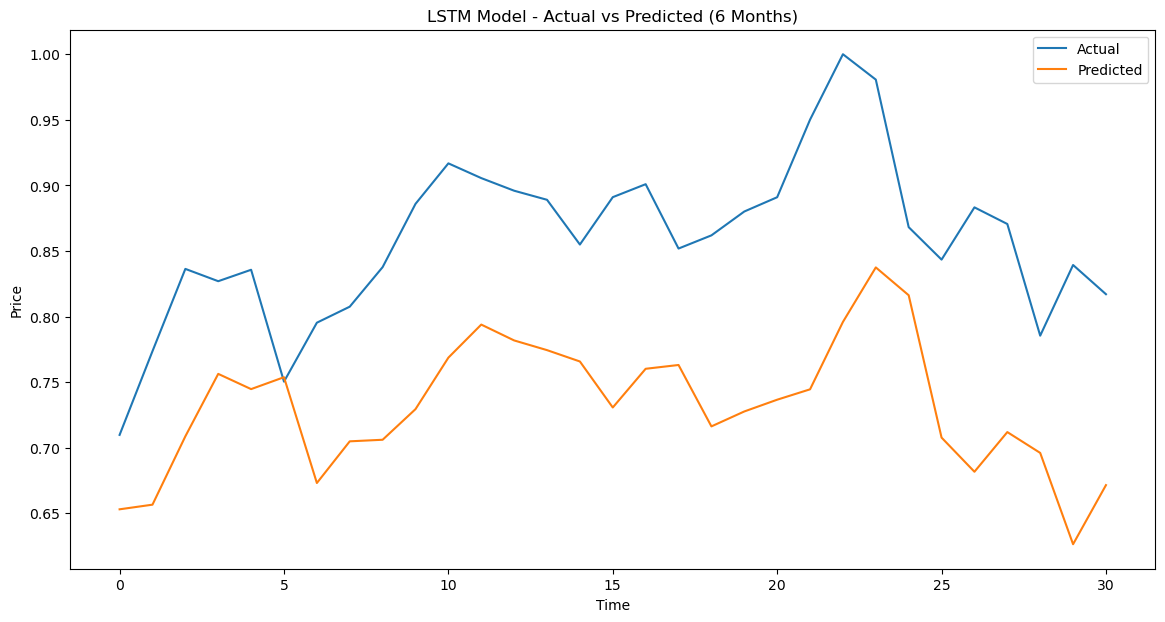

In [22]:
# Prepare input sequences and target variable for LSTM
X_six_months = []
backcandles = 30  # Number of days to look back

# Create input sequences (X) and target variable (y) for the 6 months data
for j in range(data_set_scaled_six_months.shape[1]):
    X_six_months.append([])
    for i in range(backcandles, data_set_scaled_six_months.shape[0]):
        X_six_months[j].append(data_set_scaled_six_months[i - backcandles:i, j])

# Convert lists to numpy arrays
X_six_months = np.moveaxis(X_six_months, [0], [2])
X_six_months, y_six_months = np.array(X_six_months), np.array(data_set_scaled_six_months[backcandles:, 3])  # Assuming 'close' is in the 4th column

# Reshape y to match LSTM input shape
y_six_months = np.reshape(y_six_months, (len(y_six_months), 1))

# Split 6 months data into train and test sets
split_limit_six_months = int(len(X_six_months) * 0.8)
X_train_six_months, X_test_six_months = X_six_months[:split_limit_six_months], X_six_months[split_limit_six_months:]
y_train_six_months, y_test_six_months = y_six_months[:split_limit_six_months], y_six_months[split_limit_six_months:]

# Print shapes of train and test sets for 6 months
print(X_train_six_months.shape, y_train_six_months.shape)
print(X_test_six_months.shape, y_test_six_months.shape)

# Define and compile LSTM model architecture for 6 months
model_six_months = Sequential()
model_six_months.add(LSTM(units=150, input_shape=(X_train_six_months.shape[1], X_train_six_months.shape[2])))
model_six_months.add(Dense(units=1))
model_six_months.add(Activation('linear'))
optimizer = Adam(learning_rate=0.001)
model_six_months.compile(optimizer=optimizer, loss='mse')

# Train LSTM model on 6 months data
history_six_months = model_six_months.fit(X_train_six_months, y_train_six_months, epochs=30, batch_size=10, validation_split=0.1, shuffle=True)

# Predict using the trained LSTM model on 6 months test data
y_pred_six_months = model_six_months.predict(X_test_six_months)

# Plotting results for 6 months predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test_six_months, label='Actual')
plt.plot(y_pred_six_months, label='Predicted')
plt.title('LSTM Model - Actual vs Predicted (6 Months)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


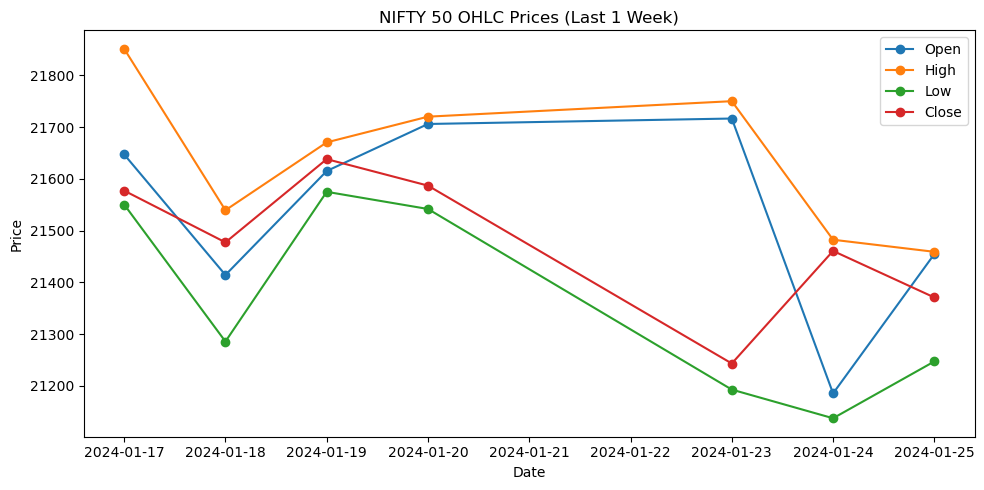

In [23]:
# Select data for the last 1 week
one_week_data = daily_ohlc.iloc[-7:]

# Plotting OHLC prices for the last 1 week
plt.figure(figsize=(10, 5))
plt.plot(one_week_data.index, one_week_data['open'], marker='o', linestyle='-', label='Open')
plt.plot(one_week_data.index, one_week_data['high'], marker='o', linestyle='-', label='High')
plt.plot(one_week_data.index, one_week_data['low'], marker='o', linestyle='-', label='Low')
plt.plot(one_week_data.index, one_week_data['close'], marker='o', linestyle='-', label='Close')
plt.title('NIFTY 50 OHLC Prices (Last 1 Week)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
# Convert daily OHLC data to DataFrame for 1 week
df_one_week = pd.DataFrame(one_week_data)

# Drop NaN values if any
df_one_week.dropna(inplace=True)

# Reset index
df_one_week.reset_index(inplace=True)

# Drop 'timestamp' column
df_one_week.drop(['timestamp'], axis=1, inplace=True)

# Normalize the dataset for 1 week
scaler_one_week = MinMaxScaler(feature_range=(0, 1))
data_set_scaled_one_week = scaler_one_week.fit_transform(df_one_week)

# Print shape of scaled data for 1 week
print(data_set_scaled_one_week.shape)


(7, 10)


In [26]:
from sklearn.metrics import mean_squared_error
import math

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return rmse

# Calculate RMSE for the main model
rmse_main = calculate_rmse(y_test, y_pred)
print(f"RMSE for main model: {rmse_main}")

# Calculate RMSE for the subset model
rmse_subset = calculate_rmse(y_test_subset, y_pred_subset)
print(f"RMSE for subset model: {rmse_subset}")

# Calculate RMSE for the 6 months model
rmse_six_months = calculate_rmse(y_test_six_months, y_pred_six_months)
print(f"RMSE for 6 months model: {rmse_six_months}")

# Calculate RMSE for the 1 week model
rmse_one_week = calculate_rmse(y_test_one_week, y_pred_one_week)
print(f"RMSE for 1 week model: {rmse_one_week}")


RMSE for main model: 0.00915821296105119
RMSE for subset model: 0.03601914743883192
RMSE for 6 months model: 0.13555955759364424
RMSE for 1 week model: 0.19013939277289893


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

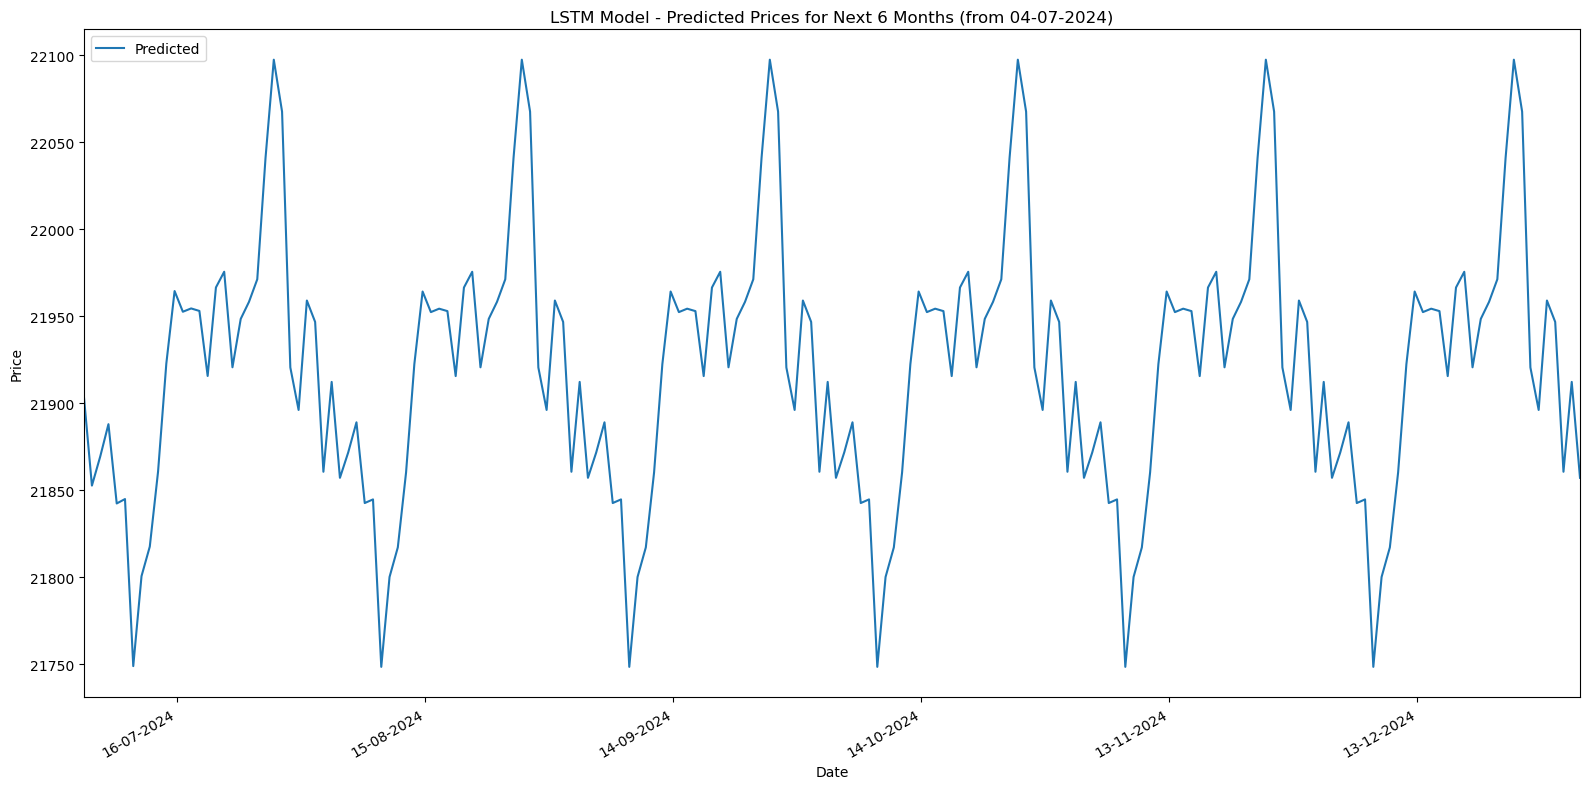

Predicted price on 04-07-2024: 21905.39
Predicted price on 01-01-2025: 21857.03


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# Assuming you have the last available data in X and scaler set up correctly
# Prepare input for predicting future values
X_future = X[-1:]  # Use the last available data to predict the future
predictions = []
# Number of days to predict into the future
days_to_predict = 182  # Approximately 6 months

for _ in range(days_to_predict):
    # Predict next day's closing price
    next_prediction = model.predict(X_future)
    predictions.append(next_prediction[0, 0])  # Append the predicted value
    # Update X_future to include the latest prediction and drop the oldest observation
    X_future = np.roll(X_future, -1, axis=1)
    X_future[0, -1, 3] = next_prediction[0, 0]  # Update the last value with the new prediction

# Reshape predictions to match the original feature shape
predictions = np.array(predictions).reshape(-1, 1)

# Instead of creating a dummy array, we'll use the last known values for other features
last_known_values = scaler.inverse_transform(X[-1, -1, :].reshape(1, -1))
repeated_last_known = np.tile(last_known_values, (len(predictions), 1))
repeated_last_known[:, 3] = predictions.flatten()

# Inverse transform predictions to get actual prices
predictions_original_scale = scaler.inverse_transform(repeated_last_known)[:, 3]

# Generate dates for x-axis
start_date = datetime.now()
dates = [start_date + timedelta(days=i) for i in range(days_to_predict)]

# Plotting future predictions
plt.figure(figsize=(16, 8))
plt.plot(dates, predictions_original_scale, label='Predicted')
plt.title(f'LSTM Model - Predicted Prices for Next 6 Months (from {start_date.strftime("%d-%m-%Y")})')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Use a DateFormatter to format the dates on x-axis
from matplotlib.dates import DateFormatter
date_formatter = DateFormatter("%d-%m-%Y")
plt.gca().xaxis.set_major_formatter(date_formatter)

# Set x-axis limits
plt.xlim(start_date, dates[-1])

# Show every 30th tick to avoid overcrowding
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))

plt.tight_layout()
plt.show()

# Print the first and last predicted prices
print(f"Predicted price on {start_date.strftime('%d-%m-%Y')}: {predictions_original_scale[0]:.2f}")
print(f"Predicted price on {dates[-1].strftime('%d-%m-%Y')}: {predictions_original_scale[-1]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

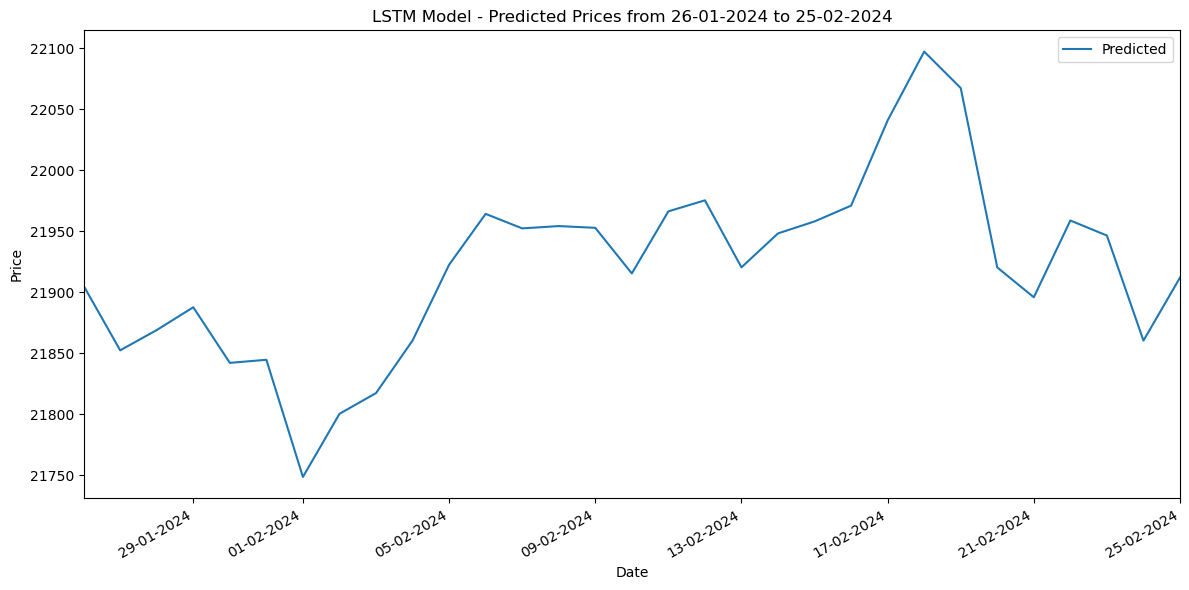

Predicted price on 26-01-2024: 21905.39
Predicted price on 25-02-2024: 21912.16


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# Assuming you have the last available data in X and scaler set up correctly
# Prepare input for predicting future values
X_future = X[-1:]  # Use the last available data to predict the future
predictions = []

# Number of days to predict into the future
days_to_predict = 31  # Predicting for one month

for _ in range(days_to_predict):
    # Predict next day's closing price
    next_prediction = model.predict(X_future)
    predictions.append(next_prediction[0, 0])  # Append the predicted value
    
    # Update X_future to include the latest prediction and drop the oldest observation
    X_future = np.roll(X_future, -1, axis=1)
    X_future[0, -1, 3] = next_prediction[0, 0]  # Update the last value with the new prediction

# Reshape predictions to match the original feature shape
predictions = np.array(predictions).reshape(-1, 1)

# Instead of creating a dummy array, we'll use the last known values for other features
last_known_values = scaler.inverse_transform(X[-1, -1, :].reshape(1, -1))
repeated_last_known = np.tile(last_known_values, (len(predictions), 1))
repeated_last_known[:, 3] = predictions.flatten()

# Inverse transform predictions to get actual prices
predictions_original_scale = scaler.inverse_transform(repeated_last_known)[:, 3]

# Generate dates for x-axis
start_date = datetime(2024, 1, 26)  # Start date for forecasting
dates = [start_date + timedelta(days=i) for i in range(days_to_predict)]

# Plotting future predictions
plt.figure(figsize=(12, 6))
plt.plot(dates, predictions_original_scale, label='Predicted')
plt.title(f'LSTM Model - Predicted Prices from {start_date.strftime("%d-%m-%Y")} to {dates[-1].strftime("%d-%m-%Y")}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Use a DateFormatter to format the dates on x-axis
from matplotlib.dates import DateFormatter
date_formatter = DateFormatter("%d-%m-%Y")
plt.gca().xaxis.set_major_formatter(date_formatter)

# Set x-axis limits
plt.xlim(start_date, dates[-1])

plt.tight_layout()
plt.show()

# Print the first and last predicted prices
print(f"Predicted price on {start_date.strftime('%d-%m-%Y')}: {predictions_original_scale[0]:.2f}")
print(f"Predicted price on {dates[-1].strftime('%d-%m-%Y')}: {predictions_original_scale[-1]:.2f}")


In [30]:
#pip install prophet

RMSE between Past Prices and Predictions: 0.4275025220172362


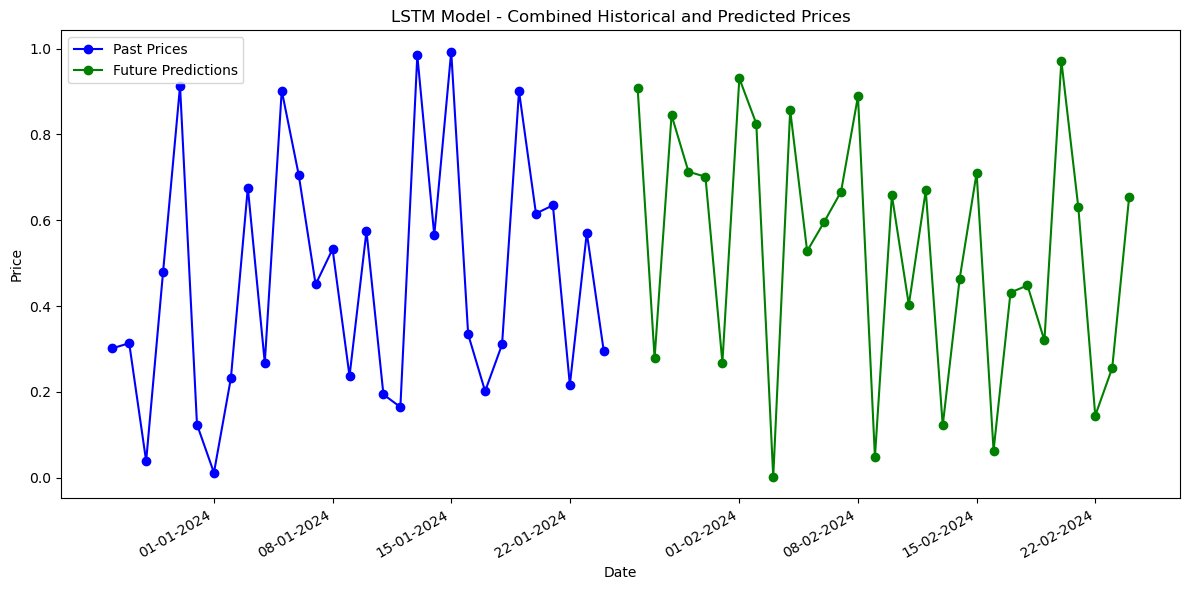

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta

# Example data, adjust based on your actual data
past_dates = [datetime(2023, 12, 26) + timedelta(days=i) for i in range(31)]
past_prices = np.random.rand(31)  # Example: Replace with your actual past prices array

# Example predicted data, adjust based on your actual predictions
dates = [datetime(2024, 1, 26) + timedelta(days=i) for i in range(30)]
predictions_original_scale = np.random.rand(30)  # Example: Replace with your actual predictions array

# Use only the first 30 days of past_prices for RMSE calculation
past_prices_trimmed = past_prices[:30]

# Calculate RMSE between past prices and predictions
rmse = np.sqrt(np.mean((past_prices_trimmed - predictions_original_scale)**2))
print(f"RMSE between Past Prices and Predictions: {rmse}")

# Plotting combined past and future predictions
plt.figure(figsize=(12, 6))

# Plot past data in blue
plt.plot(past_dates[:30], past_prices_trimmed, label='Past Prices', marker='o', color='blue')

# Plot future predictions in green
plt.plot(dates, predictions_original_scale, label='Future Predictions', marker='o', color='green')

plt.title('LSTM Model - Combined Historical and Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate and align the tick labels for better readability
plt.gcf().autofmt_xdate()

# Format dates on x-axis
date_formatter = DateFormatter("%d-%m-%Y")
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.tight_layout()
plt.show()
